In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics roboflow supervision
import ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 132.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yo

In [3]:
from ultralytics import YOLO
import os
from pathlib import Path
import shutil


data.yaml


In [4]:
data_yaml_content = """
train: /content/drive/MyDrive/Soil detection.v2i.yolov11/train
val: /content/drive/MyDrive/Soil detection.v2i.yolov11/valid
test: /content/drive/MyDrive/Soil detection.v2i.yolov11/test

nc: 4
names: ['Alluvial Soil', 'Black Soil', 'Clay Soil', 'Red Soil']
"""

with open('data.yaml', 'w') as f:
    f.write(data_yaml_content)

In [6]:
model = YOLO('yolo11s.pt')

results = model.train(
    data='data.yaml',
    epochs=100,
    imgsz=640,
    batch=16,
    project='soil_detection',
    name='yolo11s_soil_v1'
)

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo11s_soil_v12, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pr

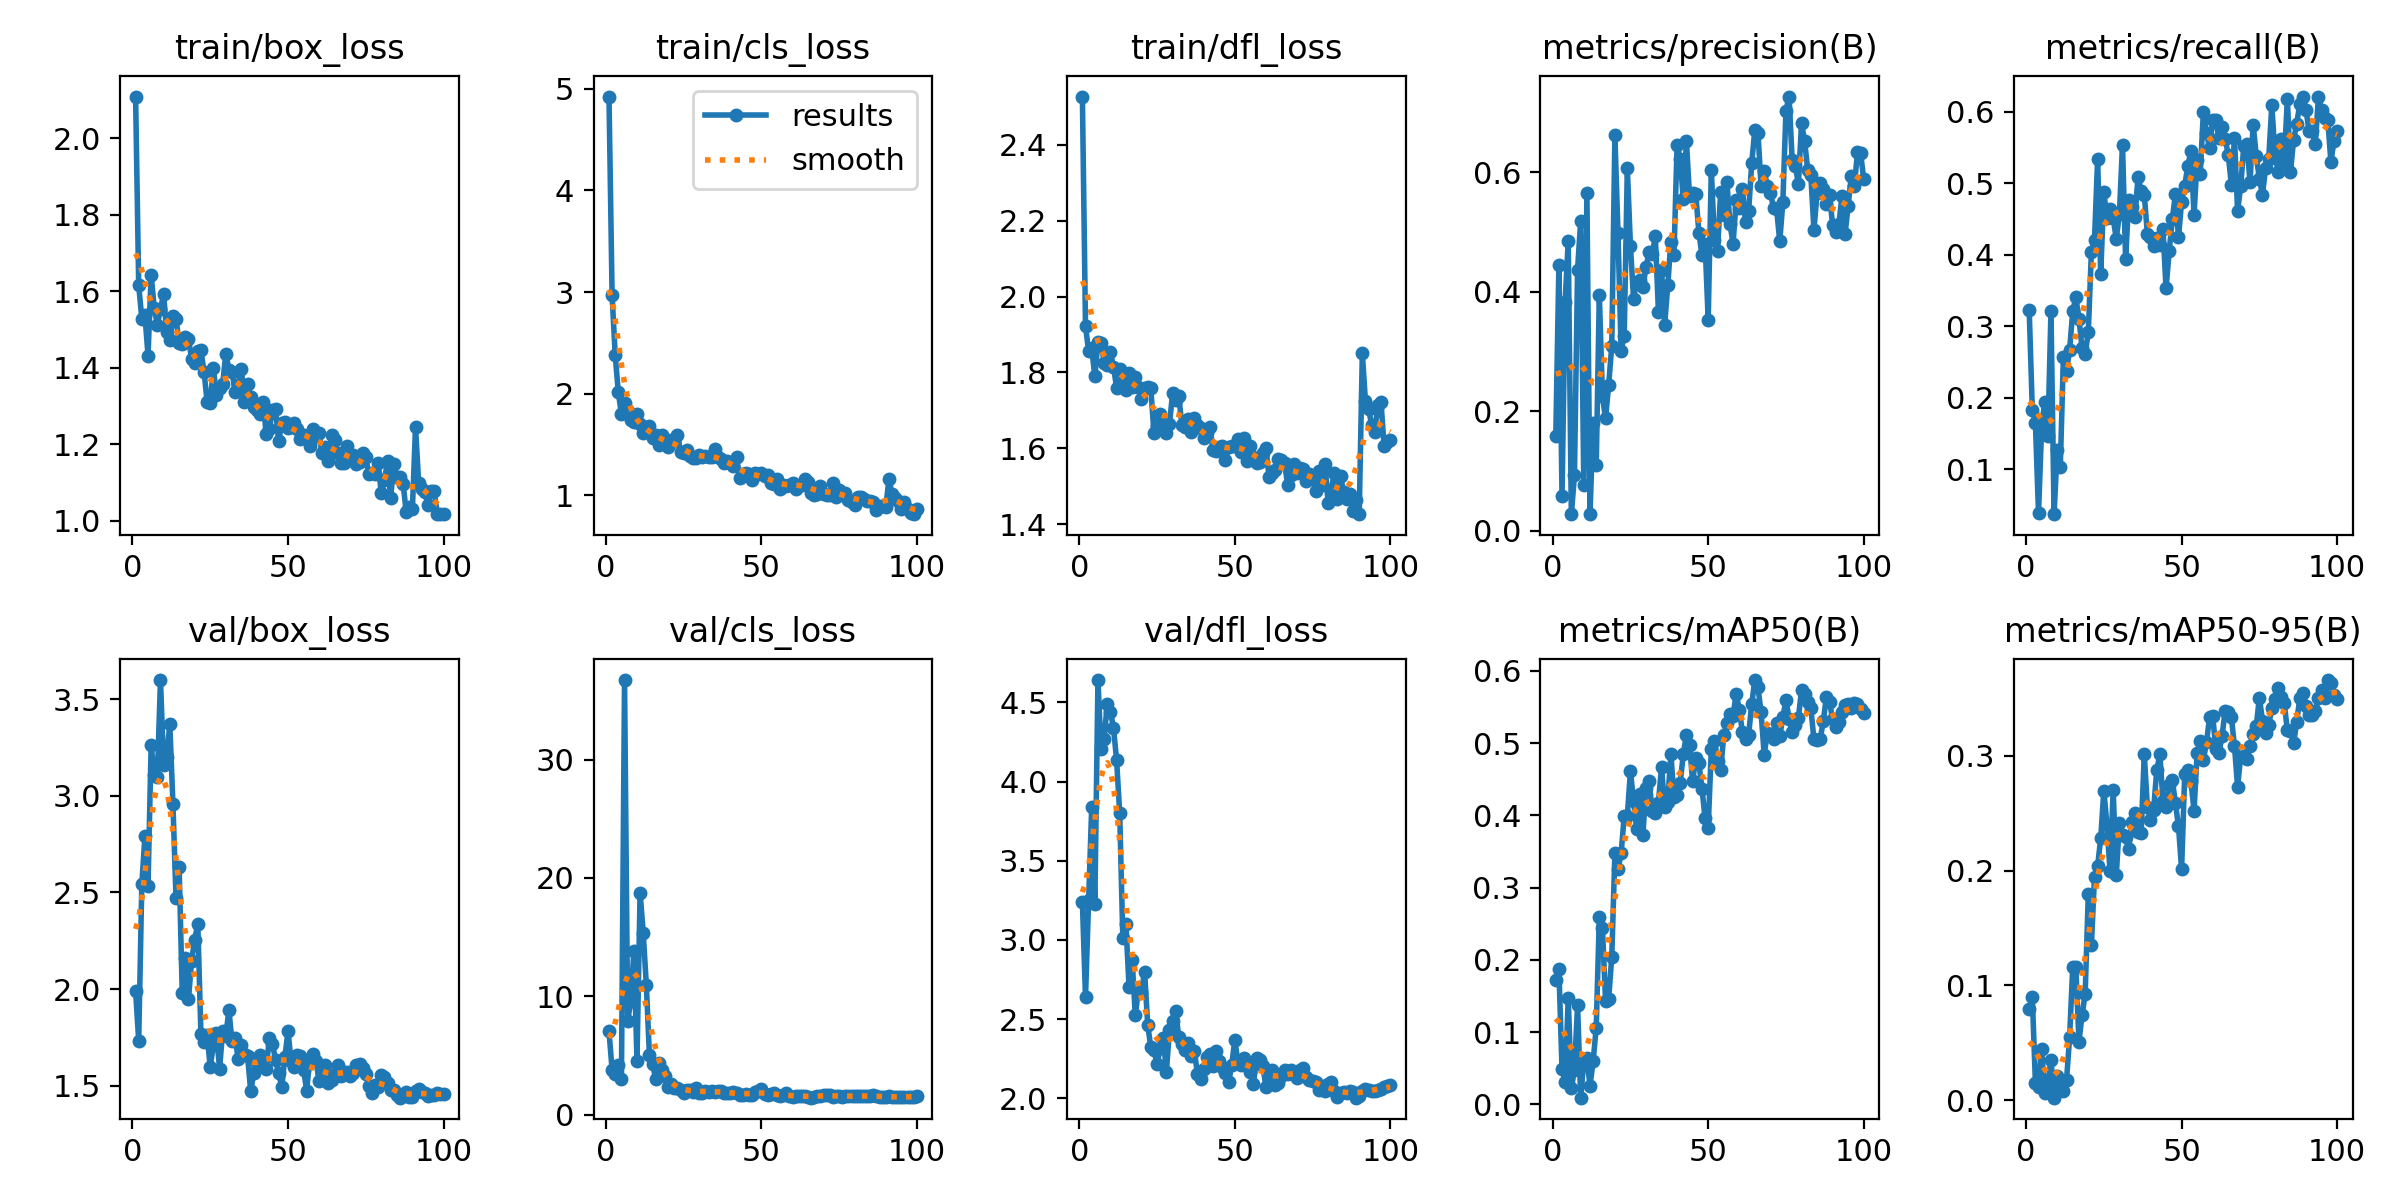

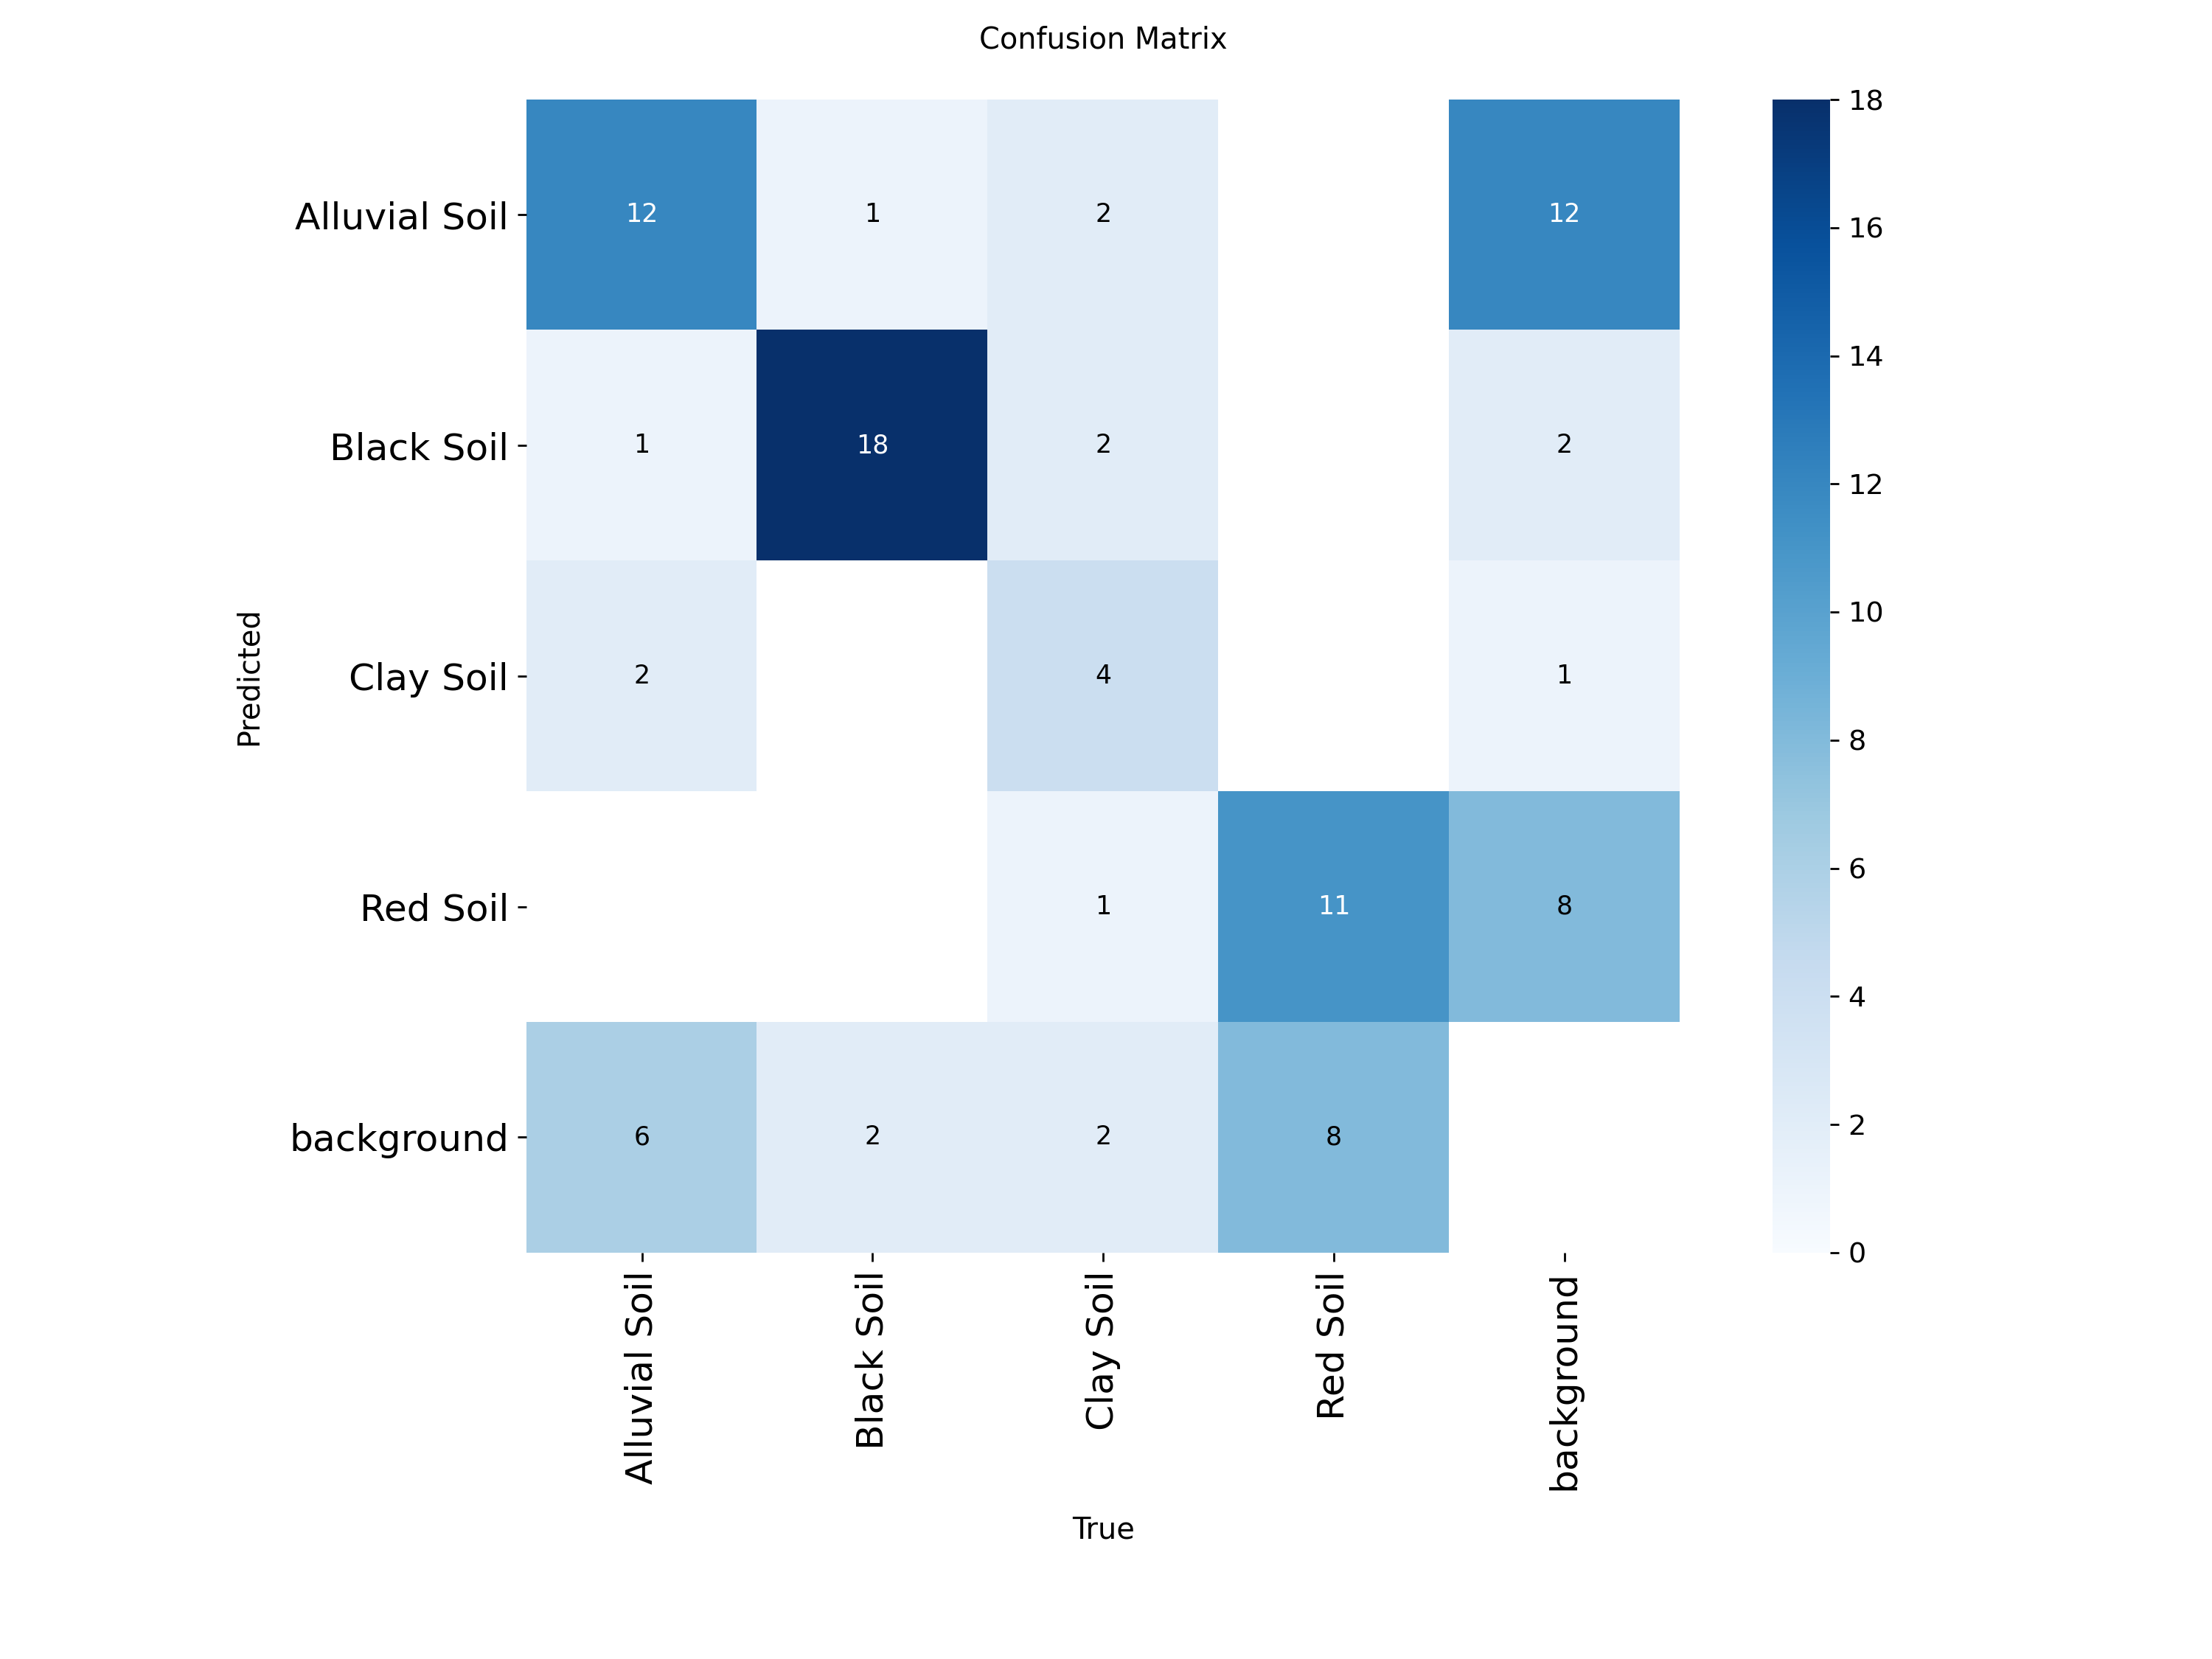

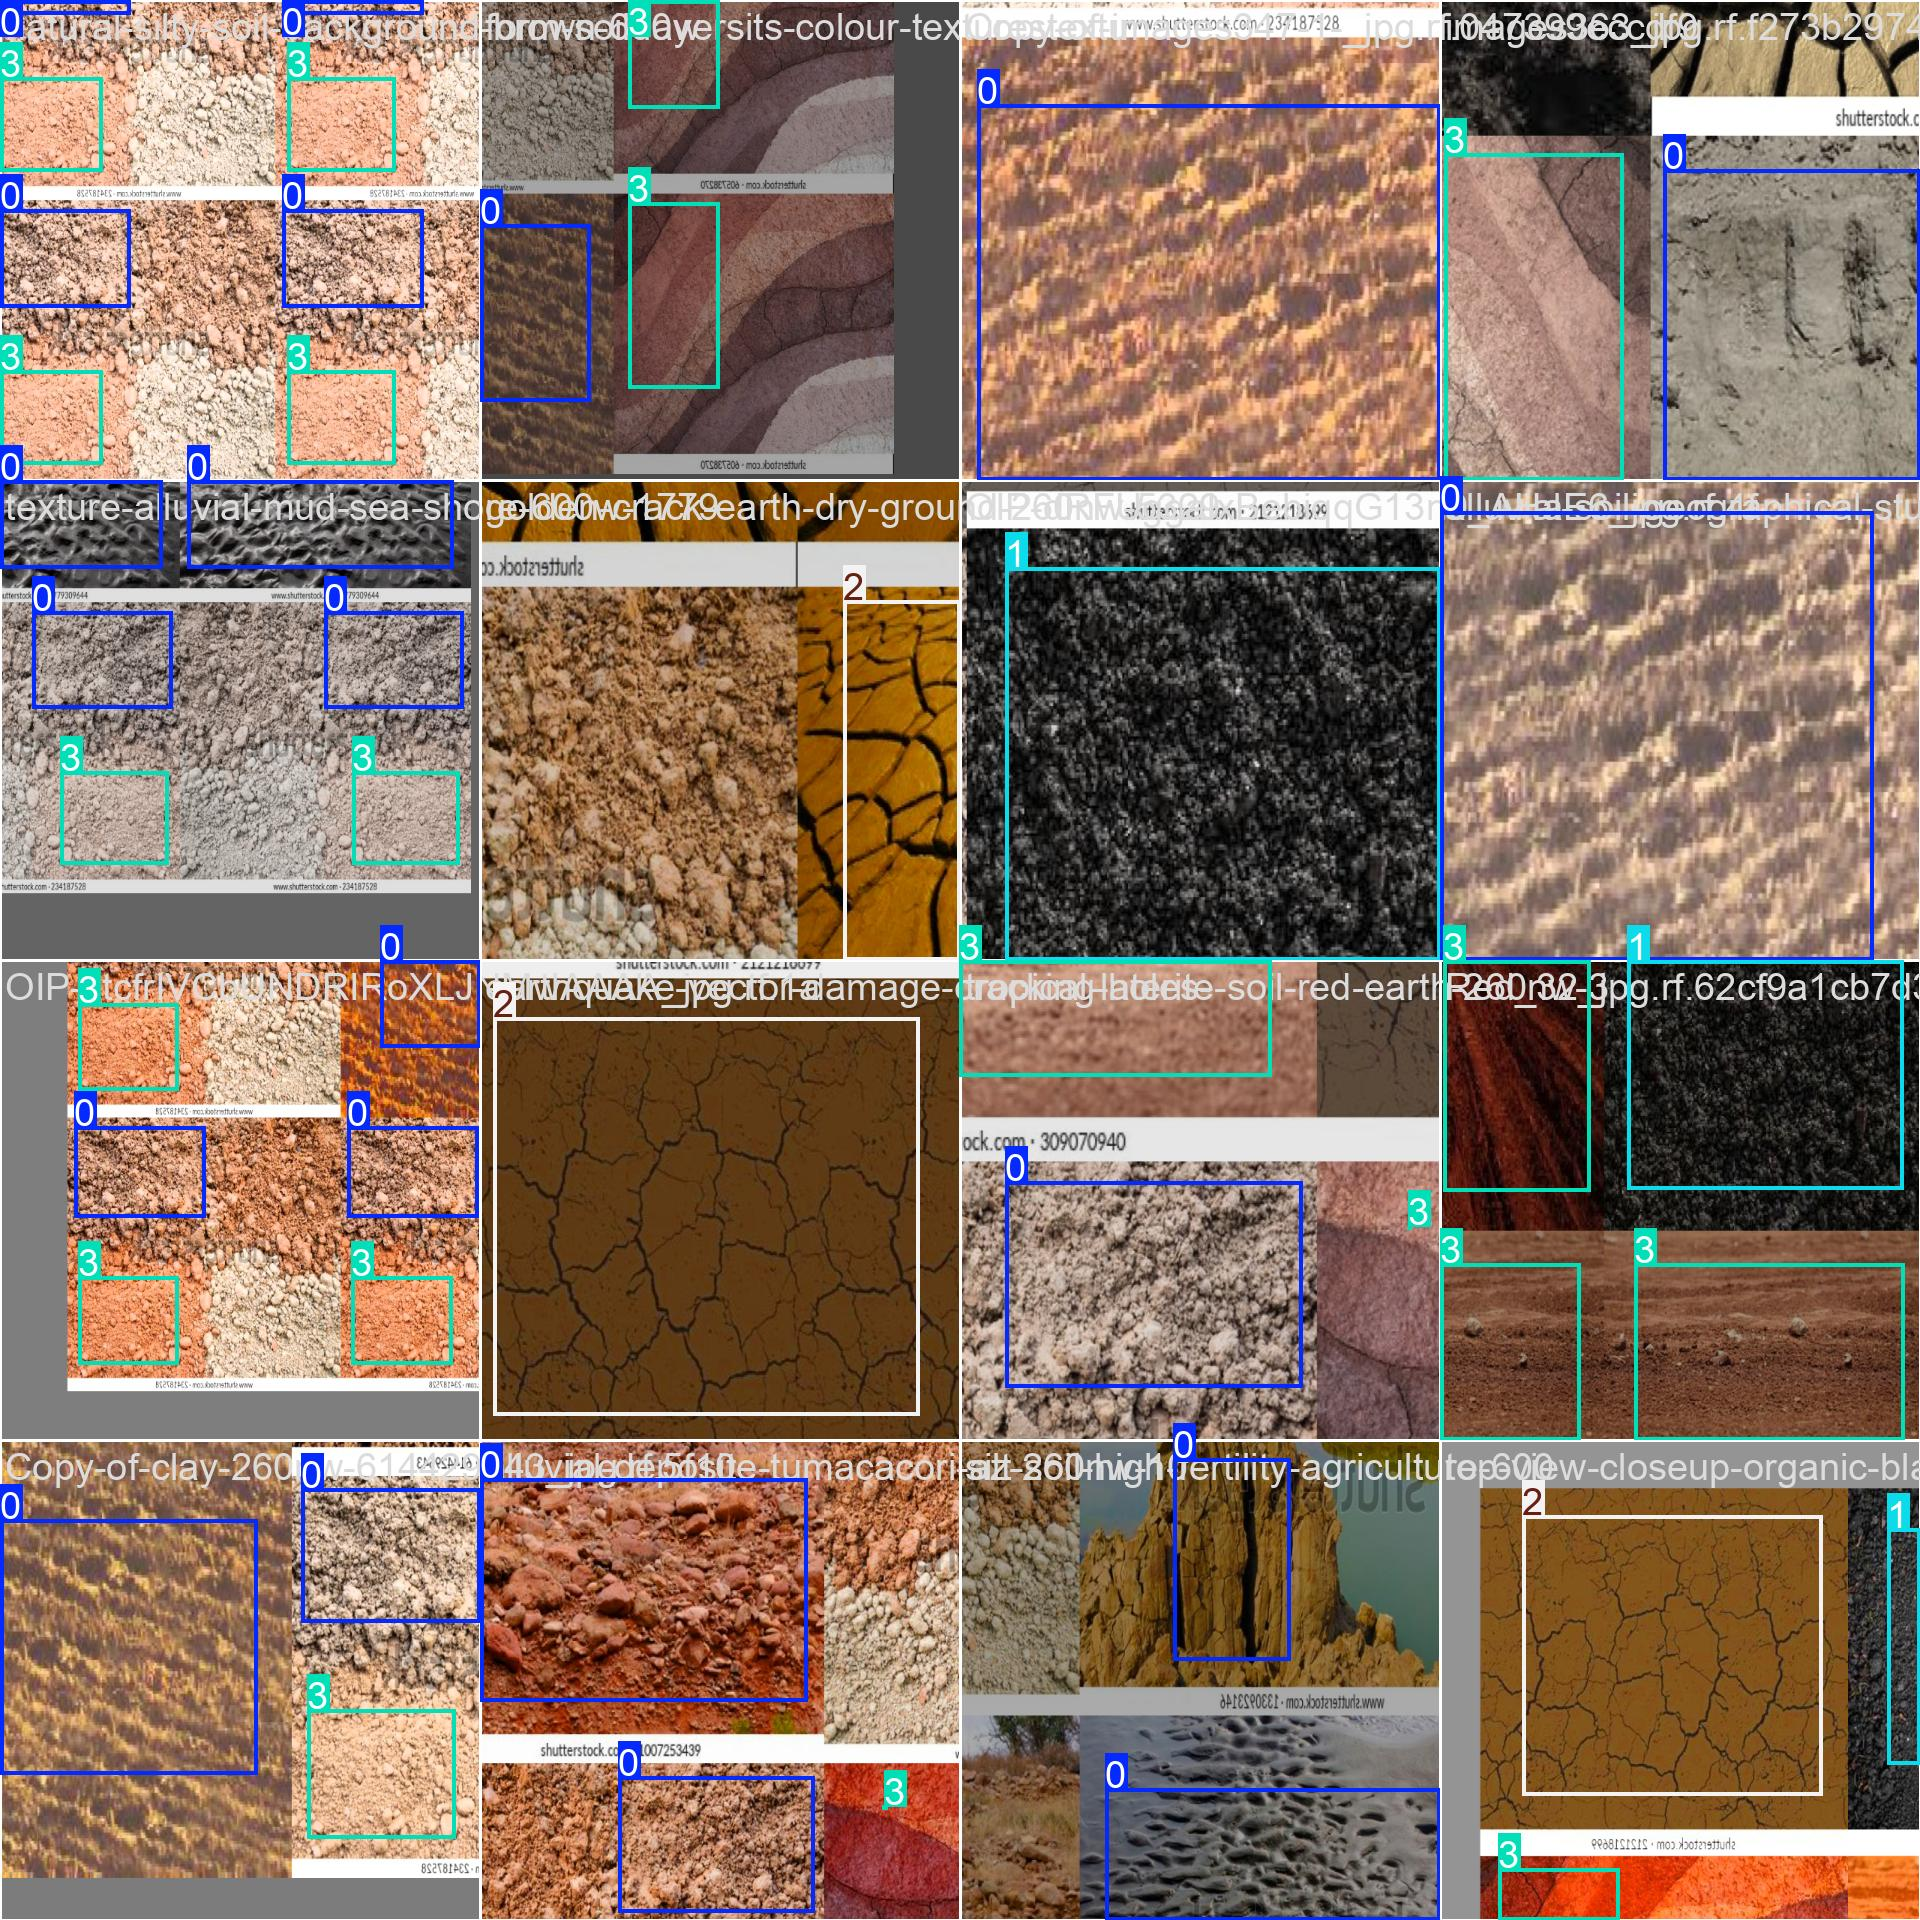

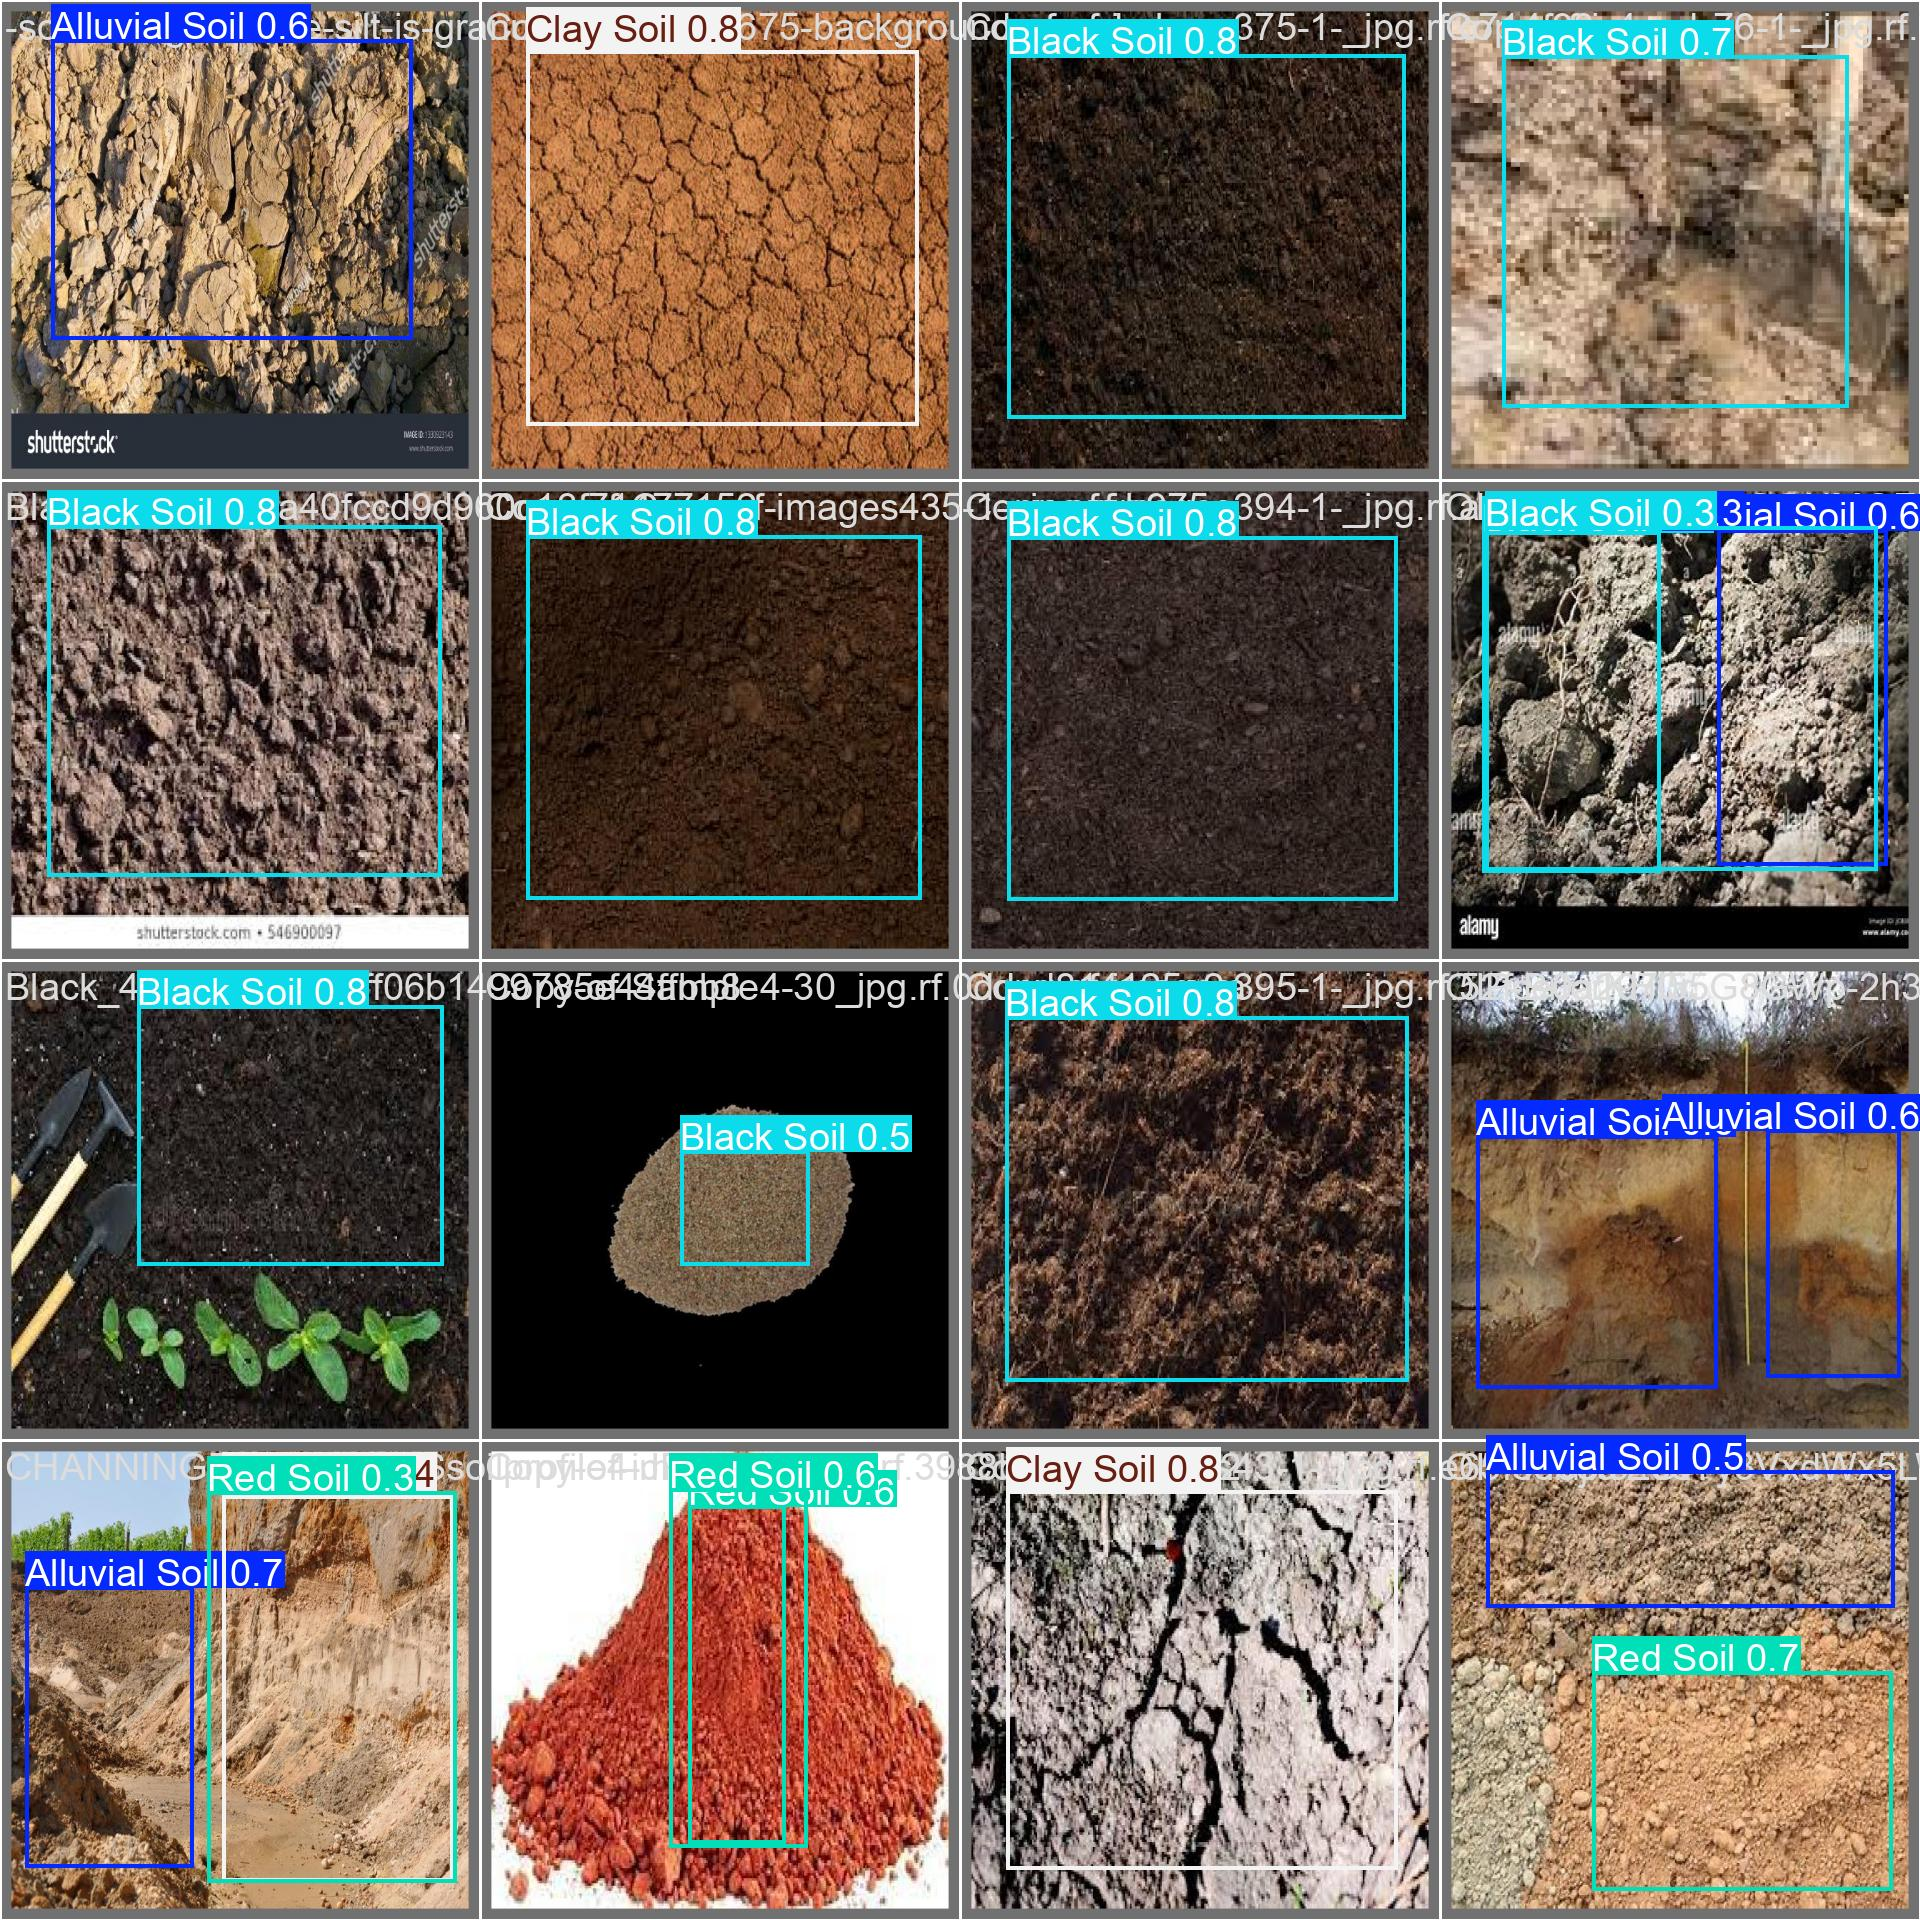

In [7]:
#  training metrics and plots
from IPython.display import Image, display

#  plot (loss, precision, recall, mAP)
display(Image('/content/soil_detection/yolo11s_soil_v12/results.png'))

#  confusion matrix
display(Image('/content/soil_detection/yolo11s_soil_v12/confusion_matrix.png'))

#training batch examples
display(Image('/content/soil_detection/yolo11s_soil_v12/train_batch0.jpg'))

# validation predictions
display(Image('/content/soil_detection/yolo11s_soil_v12/val_batch0_pred.jpg'))

In [8]:
best_model = YOLO('/content/soil_detection/yolo11s_soil_v12/weights/best.pt')

In [9]:
# Validate on test dataset
validation_results = best_model.val()

precision = validation_results.box.mp
recall = validation_results.box.mr
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"F1-score: {f1_score:.4f}")
print(f"mAP50: {validation_results.box.map50:.4f}")
print(f"mAP50-95: {validation_results.box.map:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 58.8±28.4 MB/s, size: 74.7 KB)
val: Scanning /content/drive/MyDrive/Soil detection.v2i.yolov11/valid/labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 58/58 115.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.6it/s 2.5s
                   all         58         72      0.578      0.589      0.557      0.363
         Alluvial Soil         18         21      0.488      0.619      0.482      0.252
            Black Soil         17         21      0.787      0.857      0.851       0.57
             Clay Soil          9         11      0.516      0.364      0.406       0.32
              Red Soil         15         19      0.521      0.515      0.491      0.309
Speed: 9.1ms prepro

In [10]:
# Predict on test images
results = best_model.predict(
    source='/content/drive/MyDrive/Soil detection.v2i.yolov11/test/images',
    save=True,
    conf=0.5,
    project='predictions',
    name='soil_test_results'
)

# Display some prediction results
!ls runs/predict/soil_test_results/


image 1/28 /content/drive/MyDrive/Soil detection.v2i.yolov11/test/images/Black_38_jpg.rf.cce2afe5e739cb1d77fbdfd7d51d5012.jpg: 640x640 1 Black Soil, 15.7ms
image 2/28 /content/drive/MyDrive/Soil detection.v2i.yolov11/test/images/Black_44_jpg.rf.bfb078e5b0304edb36b2cc1d57ea3cbc.jpg: 640x640 1 Black Soil, 15.7ms
image 3/28 /content/drive/MyDrive/Soil detection.v2i.yolov11/test/images/Black_47_jpg.rf.30fa0ac078480d4fbb2bdb6bd4c189c3.jpg: 640x640 1 Black Soil, 15.7ms
image 4/28 /content/drive/MyDrive/Soil detection.v2i.yolov11/test/images/Clay_47_jpg.rf.75ea8b632fb8f5e1a540b31945d9ff4d.jpg: 640x640 1 Clay Soil, 15.7ms
image 5/28 /content/drive/MyDrive/Soil detection.v2i.yolov11/test/images/Copy-of-clay-soil-cropped_jpg.rf.9dfcef24065c2fa79a282f89bff22b80.jpg: 640x640 1 Clay Soil, 15.7ms
image 6/28 /content/drive/MyDrive/Soil detection.v2i.yolov11/test/images/Copy-of-image14_jpeg.rf.4e376475395c1adc2faba2ce470bf93e.jpg: 640x640 1 Red Soil, 15.7ms
image 7/28 /content/drive/MyDrive/Soil dete

In [11]:
from ultralytics import YOLO
import os
from pathlib import Path
import shutil

def predict_soil_type(image_path, model_path='/content/soil_detection/yolo11s_soil_v12/weights/best.pt'):
    """
    Predict soil type from an image and return class counts.
    """
    model = YOLO(model_path)
    results = model.predict(image_path, conf=0.5)

    class_counts = {}
    # Process results
    for r in results:
        boxes = r.boxes
        if boxes is not None:
            for box in boxes:
                class_id = int(box.cls[0])
                confidence = float(box.conf[0])
                class_name = model.names[class_id]
                print(f"Detected: {class_name} (Confidence: {confidence:.2f})")

                # Count the occurrences of each class
                if class_name in class_counts:
                    class_counts[class_name] += 1
                else:
                    class_counts[class_name] = 1
        else:
            print("No soil detected in image")

    return results, class_counts

Making predictions on 28 images in: /content/drive/MyDrive/Soil detection.v2i.yolov11/test/images

image 1/1 /content/drive/MyDrive/Soil detection.v2i.yolov11/test/images/closeup-alluvial-soil-texturebackground-260nw-524203225_jpg.rf.6ee841398ad839c9ec9dc5fdda5d4099.jpg: 640x640 1 Alluvial Soil, 1 Black Soil, 15.6ms
Speed: 2.1ms preprocess, 15.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Detected: Black Soil (Confidence: 0.64)
Detected: Alluvial Soil (Confidence: 0.60)

image 1/1 /content/drive/MyDrive/Soil detection.v2i.yolov11/test/images/closeup-plowed-field-fertile-black-260nw-1831062274_jpg.rf.78ff99b9a89318760278d18356165383.jpg: 640x640 1 Alluvial Soil, 15.6ms
Speed: 2.2ms preprocess, 15.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Detected: Alluvial Soil (Confidence: 0.52)

image 1/1 /content/drive/MyDrive/Soil detection.v2i.yolov11/test/images/OIP-raUzyqtNr7IxQ0aTNBpYYAHaJ4_jpg.rf.5f04ee10efec74d9f7bfc0b3b66e07e5.jpg: 640x640 1 A

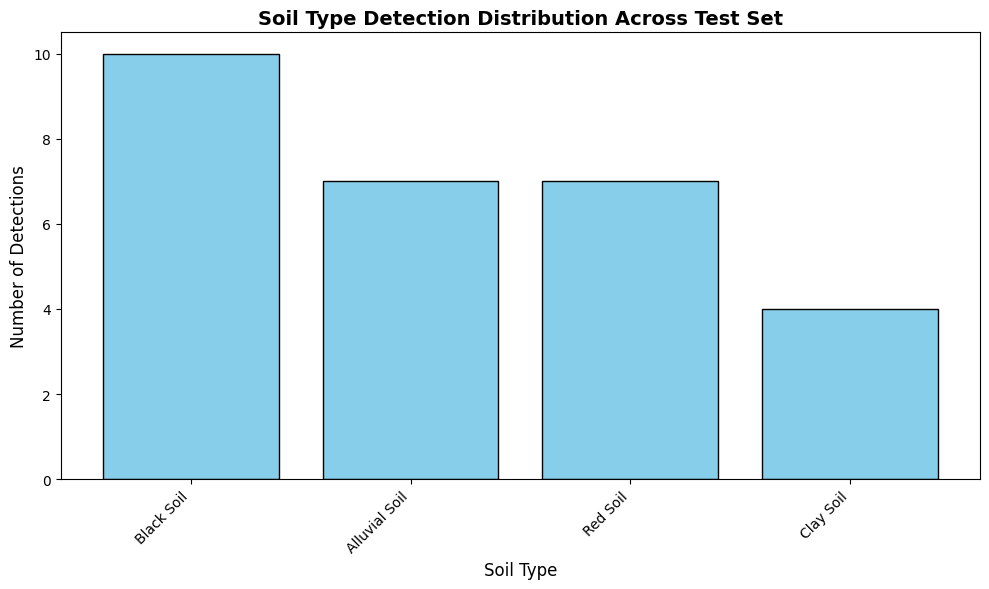

In [12]:
import matplotlib.pyplot as plt
import os

def plot_class_distribution(class_counts):

    if not class_counts:
        print("No detections to plot")
        return

    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(10, 6))
    plt.bar(classes, counts, color='skyblue', edgecolor='black')
    plt.xlabel('Soil Type', fontsize=12)
    plt.ylabel('Number of Detections', fontsize=12)
    plt.title('Soil Type Detection Distribution Across Test Set', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Use it after prediction
# Get a list of image files from the test directory
test_image_dir = '/content/drive/MyDrive/Soil detection.v2i.yolov11/test/images'
test_images = [f for f in os.listdir(test_image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Initialize a dictionary to store overall class counts
overall_class_counts = {}

if test_images:
    print(f"Making predictions on {len(test_images)} images in: {test_image_dir}")
    # Iterate through all test images
    for image_name in test_images:
        test_image_path = os.path.join(test_image_dir, image_name)
        # Get predictions and class counts for the current image
        results, counts = predict_soil_type(test_image_path)

        # Accumulate counts into overall_class_counts
        for class_name, count in counts.items():
            if class_name in overall_class_counts:
                overall_class_counts[class_name] += count
            else:
                overall_class_counts[class_name] = count

    # Plot the overall class distribution
    plot_class_distribution(overall_class_counts)

else:
    print(f"No images found in the test directory: {test_image_dir}")

In [13]:
from IPython.display import display, Image

for image_name in test_images[:10]:
    pred_img_path = f"runs/detect/predict/{image_name}"
    if os.path.exists(pred_img_path):
        display(Image(pred_img_path))


In [14]:
from ultralytics import YOLO

# Load model
model = YOLO('/content/soil_detection/yolo11s_soil_v12/weights/best.pt')

# Evaluate on test set using YOLO's built-in functions (if ground-truth available)
results = model.val(data='data.yaml', split='test')

# Calculate F1 score
precision = results.box.mp
recall = results.box.mr
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"mAP@50 (test): {results.box.map50:.4f}")
print(f"Precision (test): {precision:.4f}")
print(f"Recall (test): {recall:.4f}")
print(f"F1 score (test): {f1_score:.4f}")

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.0 ms, read: 69.9±7.2 MB/s, size: 92.6 KB)
val: Scanning /content/drive/MyDrive/Soil detection.v2i.yolov11/test/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 28/28 38.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.5it/s 1.4s
                   all         28         33      0.848      0.843      0.872      0.609
         Alluvial Soil          9         11       0.87      0.727      0.796      0.543
            Black Soil          8          9      0.814      0.977      0.963      0.592
             Clay Soil          4          4      0.919          1      0.995        0.8
              Red Soil          7          9      0.787      0.667      0.734      0.503
Speed: 7.3ms preproces